In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

---
## *Individual house price estimation in Boston area based on its characteristics.* 
#### *Which features are more and less important in determining the house price?*
---

---
### Gather Data:
---
[Source: scikit learn datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [2]:
dataset = load_boston()
# dataset source/description, num of instances, features number/names/description ?
print(dir(dataset))
print(dataset.DESCR) 

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

In [3]:
print(dataset.data.shape) # 506 instances (datapoints) , 13 features
print(dataset.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(dataset.target) # MEDV Median value of owner-occupied homes in $1000's

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

---
### *Data Exploration and Visualization:*
---
##### *Exploration: Pandas dataframes*

In [5]:
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names) # create dataframe out of the Bunch object
data['MEDV'] = dataset.target # include the target column

In [6]:
data.head() # top rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.tail() # bottom rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
data.count() # number of rows for each col

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

##### *Checking for missing data:*

In [9]:
pd.isnull(data) # pandas methods

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [11]:
data.info() # dataframe method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### *Visualization:*
[Histograms:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
##### *Histograms show the number of instances in the data that have a certain value, it shows the frequency of a paricular value. The taller the individual bar, the more occurences there are in the dataset.*
#####  *By plotting all the bars next to each other it gets a certain shape, this shape is the distribution of the data.*
##### [https://seaborn.pydata.org/introduction.html#informative-distributional-summaries](https://seaborn.pydata.org/introduction.html#informative-distributional-summaries)
##### [https://seaborn.pydata.org/tutorial/distributions.html](https://seaborn.pydata.org/tutorial/distributions.html)

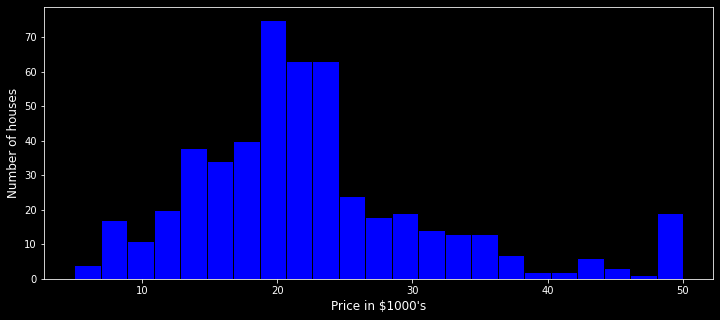

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 5])
plt.xlabel('Price in $1000\'s', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['MEDV'], bins='auto', ec='black',color='b') # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

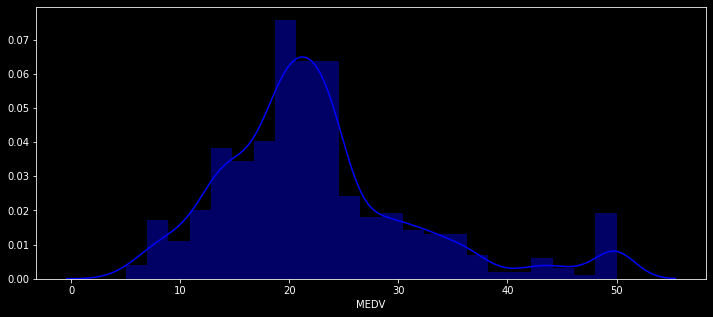

In [13]:
# the line is an estimate of the Probability Density Function (estimates distribution of data)
plt.figure(figsize=[12, 5])
sns.distplot(data['MEDV'], bins='auto',color='blue')
plt.show()

##### *Histograms may also be used to visualize individual features distribution, for example, the number of rooms:*
##### *With a quick look it's possible to figure out what the average number of rooms might be. (around 6)*

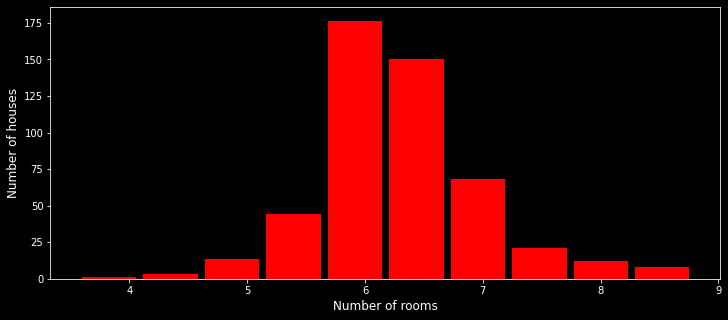

In [14]:
plt.figure(figsize=[12, 5])
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['RM'], ec='black',color='red', rwidth=0.9) # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

In [15]:
# using pandas to get the exact number for the avg.
print(data['RM'].mean())

6.284634387351779


##### *Accessibility to highways:*

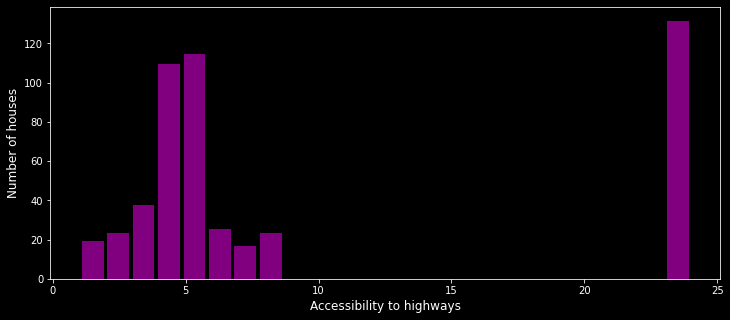

In [16]:
plt.figure(figsize=[12, 5])
plt.xlabel('Accessibility to highways', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['RAD'], bins=24, ec='black', color='purple', rwidth=0.9) # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

In [17]:
data['RAD'].value_counts() # counts how many occurences of each value

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

##### *The above histogram looks like a bar chart (because it's measured as an index value).*
##### *In this case it's better to use a bar chart and avoid hardcoded bins value:*

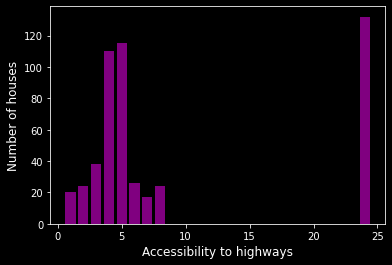

In [18]:
frequency = data['RAD'].value_counts()
plt.xlabel('Accessibility to highways', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.bar(frequency.index, height=frequency, color='purple')
plt.show()

---
#### *Statistical descriptions:*

In [19]:
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### *Correlation is the degree to which things move together*
##### **Positive correlation:** *If one thing is high, the other thing tends to be high as well.* (+1)
##### **Negative correlation:** *If ne thing is high, the other thing tends to be low.* (-1)
#### $\rho_{XY} = corr(X, Y)$ , $ -1.0 \leq \rho_{X,Y} \leq +1.0 $

In [20]:
# house price vs number of rooms
print('Correlation (house price vs number of rooms):', data['MEDV'].corr(data['RM']))
'Correlation (house price vs pupil/teacher ratio):', 
# house price vs PTRATIO (pupil teacher ratio)
# PTRATIO measures schools quality. The higher the ratio, lower the quality of education tends to be.
# quality of education reflects on house prices. (lower quality -> high PTRATIO -> lower prices)
print('Correlation (house price vs pupil/teacher ratio):', data['MEDV'].corr(data['PTRATIO']))

Correlation (house price vs number of rooms): 0.6953599470715393
Correlation (house price vs pupil/teacher ratio): -0.5077866855375616


In [21]:
# whole correlation table
data.corr() # pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
# get rid of duplicate values
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


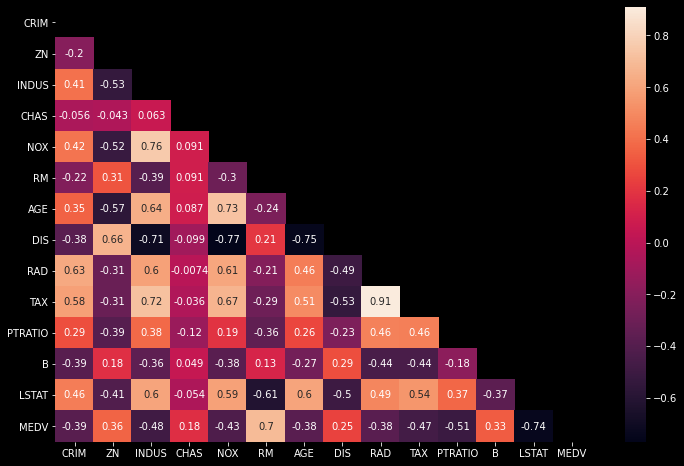

In [23]:
plt.figure(figsize=[12, 8])
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

##### Pearson correlation does not work for discrete values!
##### *Can it be simplified by excluding irrelevant data?*
##### *Tests for possible multicollineatiry?*
### *Correlation does **not** imply causation*
---

---
#### *Visualization with scatter plots:*
---

##### *matplotlib:*

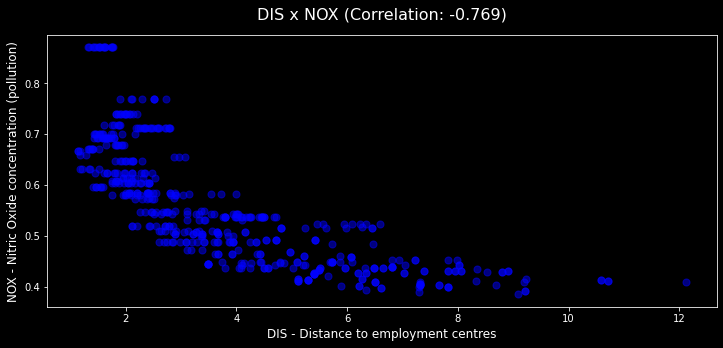

In [24]:
dis_nox_corr = round(data['DIS'].corr(data['NOX']), 3)
plt.figure(figsize=[12, 5])
plt.title(f'DIS x NOX (Correlation: {dis_nox_corr})', fontsize=16, pad=16)
plt.xlabel('DIS - Distance to employment centres', fontsize=12)
plt.ylabel('NOX - Nitric Oxide concentration (pollution)', fontsize=12)

plt.scatter(x=data['DIS'], y=data['NOX'], c='b', s=50, alpha=0.5)
plt.show()

##### *seaborn:*

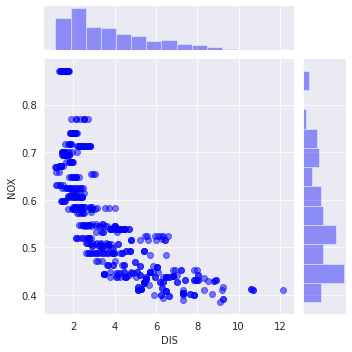

In [25]:
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='b', height=5, joint_kws={'alpha': 0.5})
plt.show()

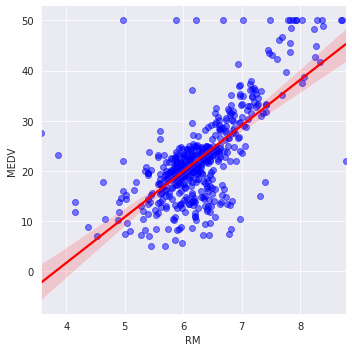

In [26]:
# .lmplot() - Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='RM', y='MEDV', data=data, height=5, 
           scatter_kws={'color':'blue', 'alpha':0.5}, line_kws={'color':'red'})
plt.show()

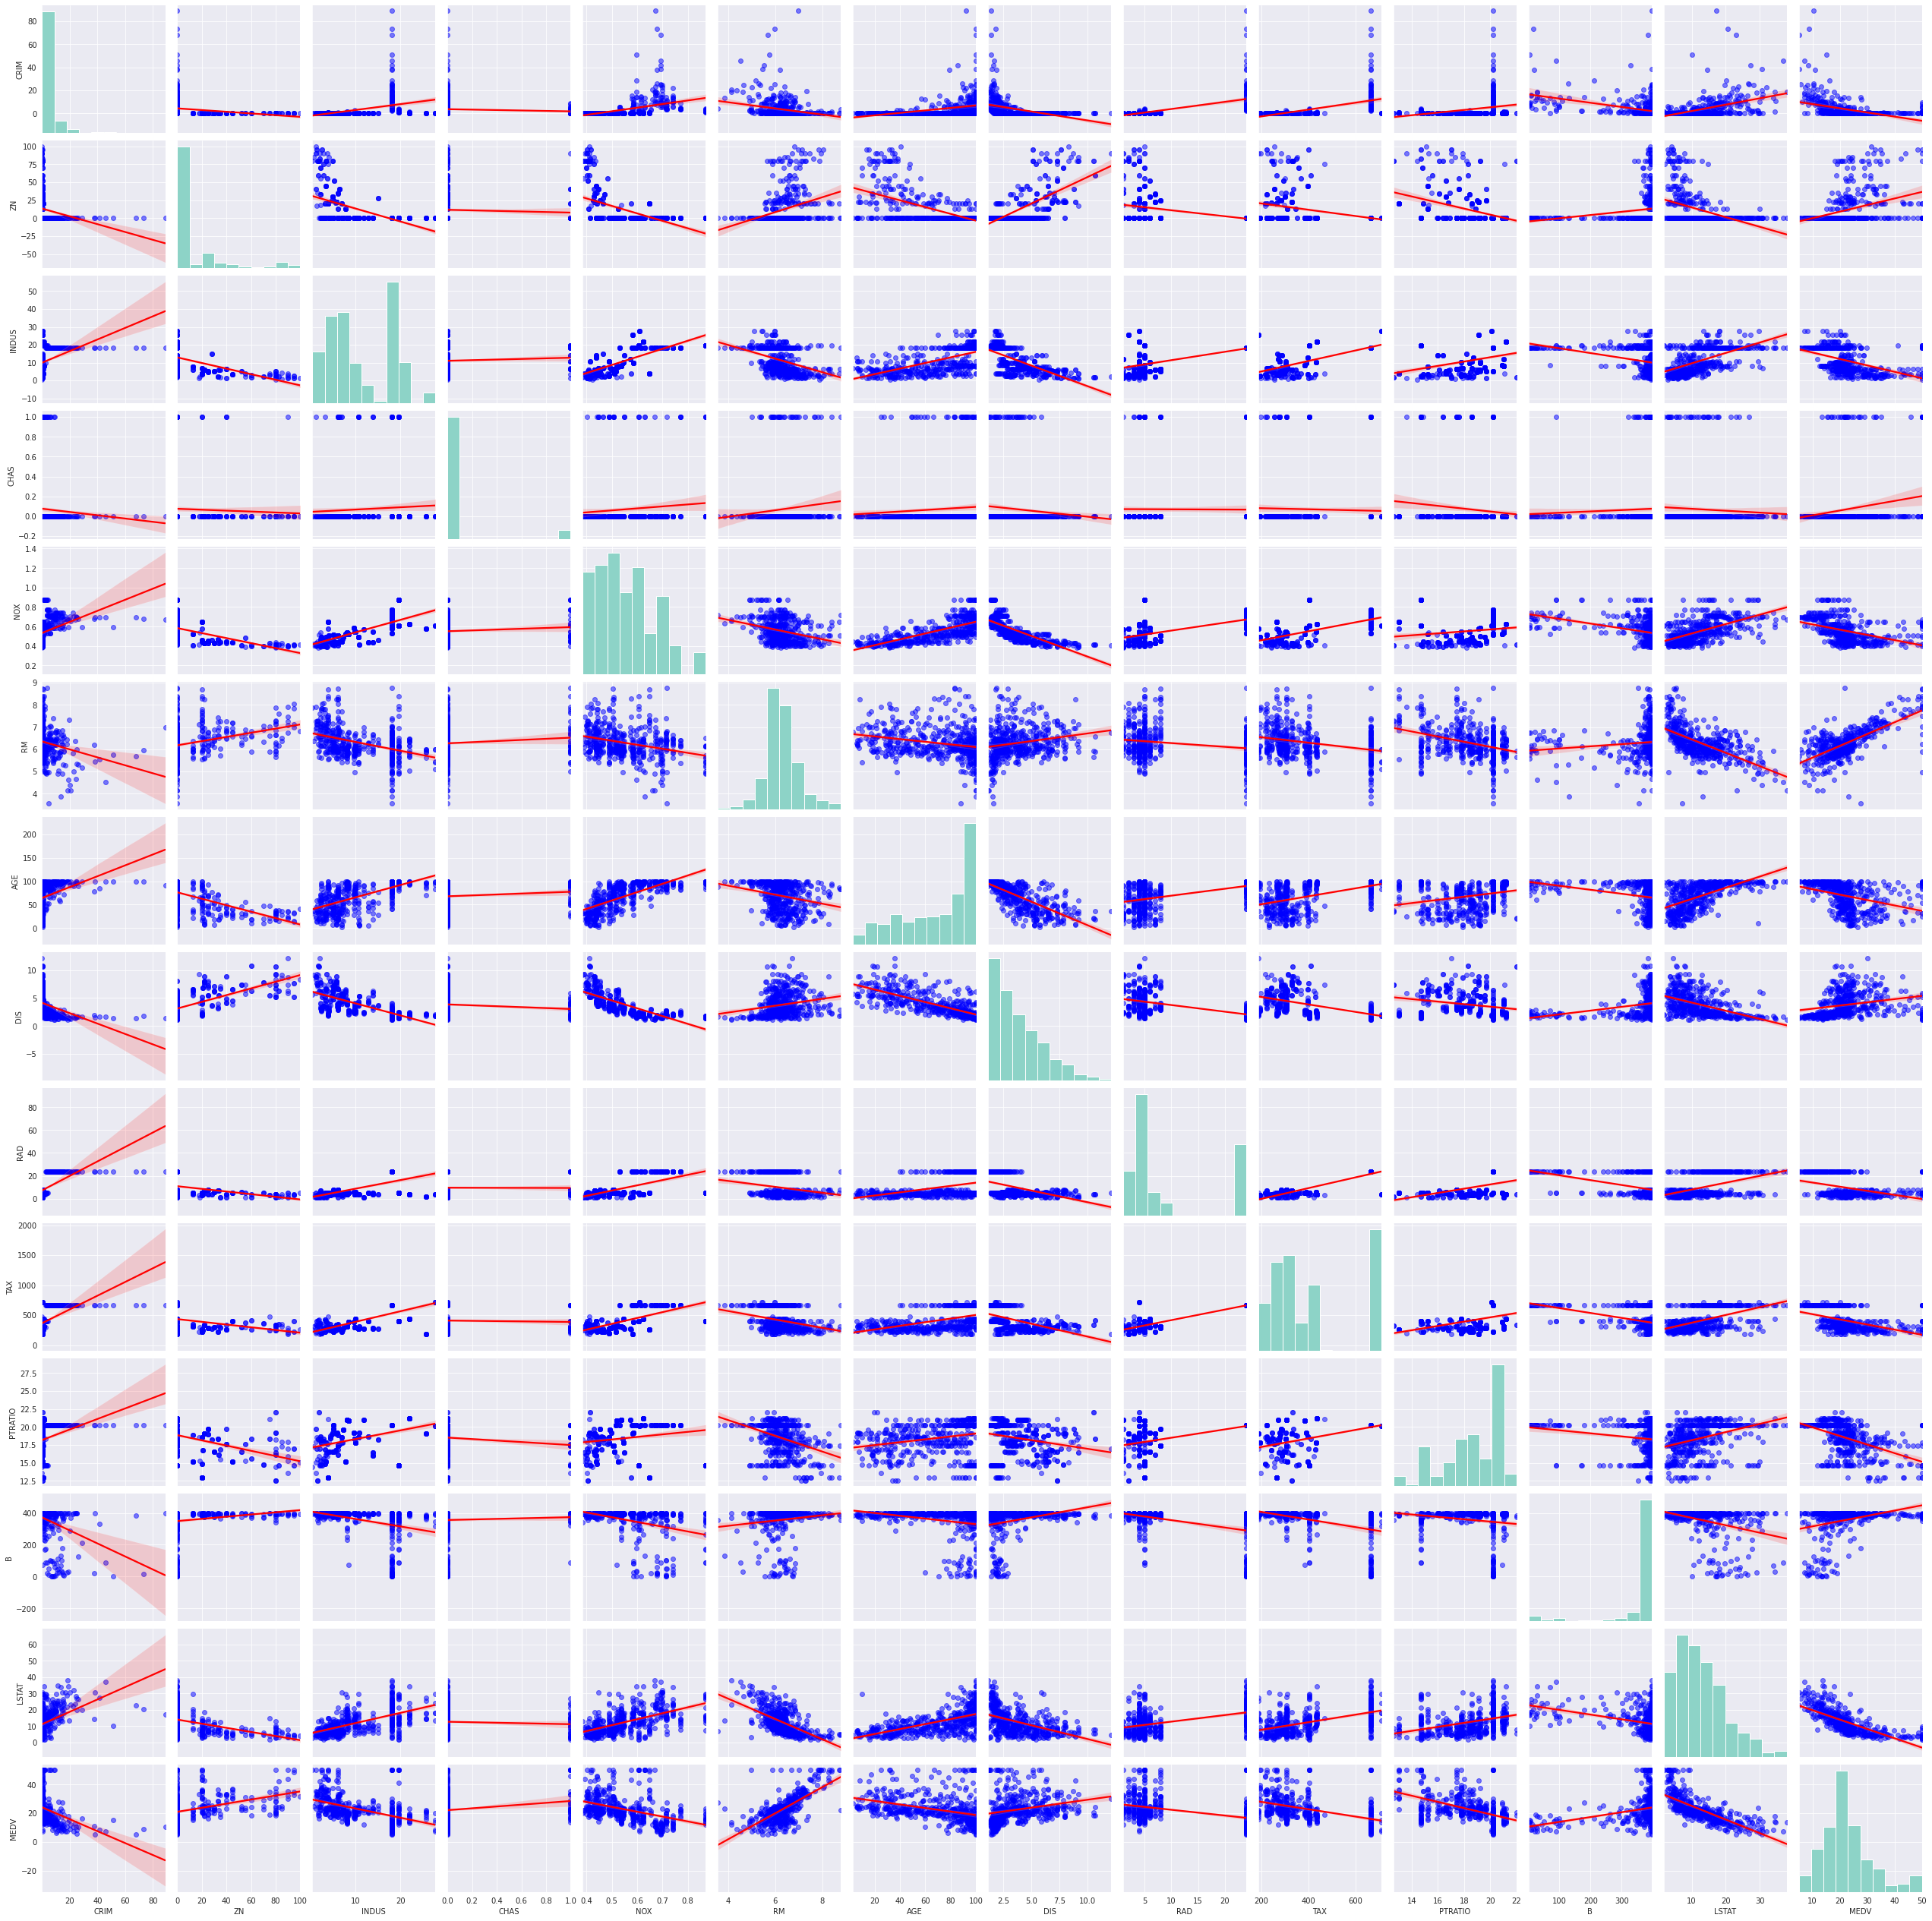

CPU times: user 1min 6s, sys: 381 ms, total: 1min 7s
Wall time: 1min 7s


In [27]:
%%time
sns.pairplot(data, kind='reg',
            plot_kws={'scatter_kws':{'color':'blue', 'alpha':0.5}, 'line_kws':{'color':'red'}})
plt.show()

#### *The image above shows scatter plots for every single column in the data frame, as well as the regression line to support the visualization of the correlation between them.*
---

---
### *Model: Multivariable regression*
---

##### *Shuffle and split training/test data:*

In [28]:
target = data['MEDV']
features = data.drop('MEDV', axis=1)

# tuple unpacking (random_state used for replicability)
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

In [29]:
print('Features train size: ', len(X_train)/len(features))

Features train size:  0.7984189723320159


##### *Train algorithm:*

In [30]:
reg = LinearRegression().fit(X_train, y_train)
# R² for training and test data
print('R-Squared (Training data): ', reg.score(X_train, y_train))
print('R-Squared (Test data): ', reg.score(X_test, y_test))
# intercept and coefs
print('Intercept: ', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coefficient'])

R-Squared (Training data):  0.750121534530608
R-Squared (Test data):  0.6709339839115651
Intercept:  36.533051382824596


,coefficient
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


#### *The table above clearly shows the impact each feature has on the target*
---

---
### *Model evaluation:*
---

#### *Data transformations:*
##### *Data transformation is the process of changing the format, structure, or values of data.*

##### *By looking to the target's histogram it's possible to see that the distribution is skewed to the right, in this case a transformation might improve the model. A log transformation would shift the distribution and affect more the right tail, probably making it easy to fit the model.*

In [31]:
y_skew = data['MEDV'].skew()
print(y_skew)

1.1080984082549072


In [32]:
y_log = np.log(data['MEDV'])
print(y_log.skew())

-0.33032129530987864


##### *With the transformation the skew is now closer to 0 (normal distribution) than it was before.*

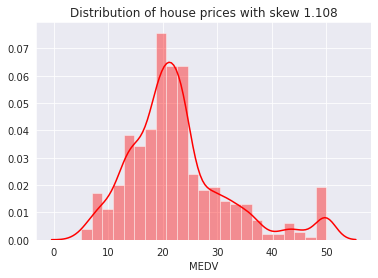

In [33]:
sns.distplot(data['MEDV'], color='red')
plt.title(f'Distribution of house prices with skew {round(y_skew, 3)}')
plt.show()

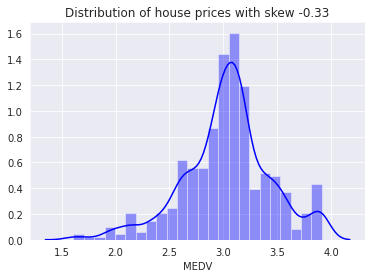

In [34]:
sns.distplot(y_log, color='blue')
plt.title(f'Distribution of house prices with skew {round(y_log.skew(), 3)}')
plt.show()

##### *The distribution is definitely more symmetrical.*
---
#### *Re-train the model with transformed data:* 

In [35]:
target = np.log(data['MEDV']) # transformed targets
features = data.drop('MEDV', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)
reg = LinearRegression().fit(X_train, y_train)
print('R-Squared (Training data): ', reg.score(X_train, y_train))
print('R-Squared (Test data): ', reg.score(X_test, y_test))
print('Intercept: ', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coefficient'])

R-Squared (Training data):  0.7930234826697583
R-Squared (Test data):  0.7446922306260735
Intercept:  4.059943871775192


,coefficient
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


#### *The performance of the model has improved with the transformation. It now has a higher R² and a better fit.*
##### *The parameters interpretation also changed. To see the actual meaning of the coefficients, the log transformation has to be reversed in each one of them.*

---
### *Coefficients evaluation:*
##### *Using the p-value to evaluate the explanatory power of the coefficients.*
##### *For that there is a module called [Statsmodels](https://www.statsmodels.org/stable/index.html)*
##### **About p-value:** [https://www.scribbr.com/statistics/p-value/](https://www.scribbr.com/statistics/p-value/)

In [36]:
X_incl_const = sm.add_constant(X_train) # include the intercept value
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
model = sm.OLS(endog=y_train, exog=X_incl_const) # Ordinary Least Square, returns lin reg model
results = model.fit() # fit method from OLS, returns RegressionResults

# RegressionResults class:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults
pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 4)})

,coef,p-values
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


##### *'P-values are most often used by researchers to say whether a certain pattern they have measured is statistically significant. Statistical significance is another way of saying that the p-value of a statistical test is small enough to reject the null hypothesis of the test. How small is small enough? The most common threshold is p < 0.05; that is, when you would expect to find a test statistic as extreme as the one calculated by your test only 5% of the time.'*
---

---
### *Multicollinearity test: (VIF)*
##### *Multicollinearity happens when 2 or more predictors variables in a regression are highly related to one another. In that case they don't provide unique or independet information to the model. The consequences might be:*

##### *-Loss of realiability;*
##### *-High variability in the coefficient estimates (instability);*
##### *-Strange findings (misleading / nonsense).*
##### *'VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.'*


#### **About the topic:** *[https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)*

In [37]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1) # .values: dataframe -> ndarray

1.7145250443932485

In [38]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
      for i in range (len(X_incl_const.columns))] # syntax for populating a list with a loop
print(vif)
pd.DataFrame({'coef_name': X_incl_const.columns,
            'vif': np.around(vif, 3)}) # create a dataframe out of them to better visualize

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000578, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364717, 2.812544292793036]


,coef_name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


[https://www.statisticshowto.com/variance-inflation-factor/](https://www.statisticshowto.com/variance-inflation-factor/)
#### Interpreting the Variance Inflation Factor
##### 'Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.'
---
##### 'Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF **above 10** indicates high correlation and is cause for concern. Some authors suggest a more conservative level of **2.5 or above.**'
---

---
### Model simplification:
#### *The bayesian information criterion (BIC)*
---

##### *Looking back to the correlation table, it's noticeable that the feature 'DIS' is the less correlated to the target with 0.25, but also it is highly correlated with the 'INDUS' feature.*
##### *Looking at the p-values table it's possible to realize that the DIS feature is actually very statistically significant to the model, with a p-value factor of 0. On the other hand, the INDUS feature is not that significant with a p-value of ~0.45 while the threshold for the p-value is 0.05.*
##### *Even if the p-value indicates that some feature is statistically insignificant to the model, it's not trivial thing to drop features from the model, even those features may add value to the model as a whole by providing some kind of information.*
##### *So it is necessary to make tests:*

In [39]:
# original model with all features and log target
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
results = model.fit()

orig_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 4)})
print(results.rsquared)
print(results.bic)

0.7930234826697583
-139.74997769478875


In [40]:
# modified model with INDUS feature dropped.
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)
model = sm.OLS(endog=y_train, exog=X_incl_const)
results = model.fit()

minus_indus_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 4)})
print(results.rsquared)
print(results.bic)

0.7927126289415162
-145.1450885559114


[https://machinelearningmastery.com/probabilistic-model-selection-measures/](https://machinelearningmastery.com/probabilistic-model-selection-measures/)
##### *In statistics, the BIC is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred.*
##### *In the test, the BIC value got lower while the r-squared remained the same. It means a improvement in terms of reducing the complexity of the model while keeping the performance.*
#### *As the simplification was successful, it's probably a good idea to go further and make some more tests dropping other features that might be statistically insignificant for the model:*

In [41]:
# modified model with INDUS and AGE features dropped. (p-value of AGE = 0.2)
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(endog=y_train, exog=X_incl_const)
results = model.fit()

minus_indus_age_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 4)})
print(results.rsquared)
print(results.bic)

0.7918657661852815
-149.49934294224678


##### *Improvement on complexity reduction once again.*
---

In [42]:
frames = [orig_coef, minus_indus_coef, minus_indus_age_coef]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.0000,4.056231,0.0000,4.035922,0.0000
CRIM,-0.010672,0.0000,-0.010721,0.0000,-0.010702,0.0000
ZN,0.001579,0.0086,0.001551,0.0097,0.001461,0.0141
INDUS,0.002030,0.4445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.0382,0.082795,0.0320,0.086449,0.0249
NOX,-0.704068,0.0000,-0.673365,0.0000,-0.616448,0.0001
RM,0.073404,0.0001,0.071739,0.0001,0.076133,0.0000
AGE,0.000763,0.2092,0.000766,0.2070,NaN,NaN
DIS,-0.047633,0.0000,-0.049394,0.0000,-0.052692,0.0000
RAD,0.014565,0.0000,0.014014,0.0000,0.013743,0.0000


#### *The above dataframe shows that despite the modifications on the model, the coefficients remained **stable**. It was expected because there were no indication of multicollinearity in the tests.*
---

---
### *Residual Analysis*
---

In [43]:
# last version of model: using log target and 2 dropped features
target = np.log(data['MEDV'])
features = data.drop(['MEDV', 'INDUS', 'AGE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# residuals = y_train - results.fittedvalues # (residual = actual_y - predicted_y)

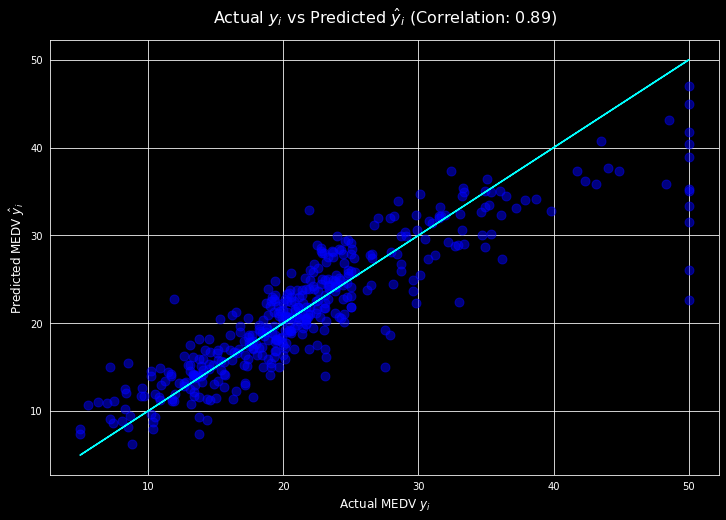

In [44]:
# Actual y vs Predicted y
corr = round(y_train.corr(results.fittedvalues), 2)
plt.style.use('dark_background')

plt.figure(figsize=[12,8])
plt.title(f'Actual $y_i$ vs Predicted $\hat y_i$ (Correlation: {corr})', size=16, pad=16)
plt.xlabel('Actual MEDV $y_i$', size=12)
plt.ylabel('Predicted MEDV $\hat y_i$', size=12)
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='b', alpha=0.5, s=80)
plt.plot(np.e**y_train, np.e**y_train, c='cyan') # perfect prediction
plt.show()

##### *That strange pattern on the right side of the graph (x =~ 50) indicates that there might be room for some improvements in the model.*
##### *The histogram had already showed that there were some outliers in the right tail.*

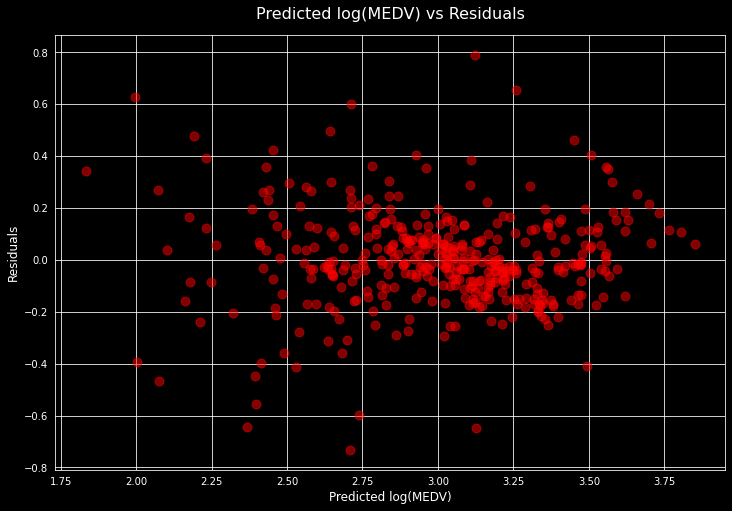

In [45]:
# residuals vs predicted values
plt.figure(figsize=[12,8])
plt.title(f'Predicted log(MEDV) vs Residuals', size=16, pad=16)
plt.xlabel('Predicted log(MEDV)', size=12)
plt.ylabel('Residuals', size=12)
plt.scatter(x=results.fittedvalues, y=results.resid, c='r', alpha=0.5, s=80)
# plt.plot(np.e**y_train, np.e**y_train, c='cyan') # perfect prediction
plt.show()

#### *The residual graph doesn't seem to have any obvious patterns (except for the right tail data points already spotted before), it seems to be random and centered around 0, which is good and indicates that the model is kind of correct on average.*
---

#### *Residuals distribution,*
##### *Checking for normality:*

Residuals mean: -0.0
Residuals Skew: 0.118


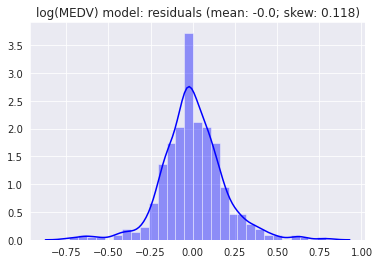

In [46]:
resid_mean = round(results.resid.mean(), 3) # always equal to zero?
resid_skew = round(results.resid.skew(), 3)
print(f'Residuals mean: {resid_mean}\nResiduals Skew: {resid_skew}')
sns.set_style('darkgrid')
sns.distplot(results.resid, color='blue')
plt.title(f'log(MEDV) model: residuals (mean: {resid_mean}; skew: {resid_skew})')
plt.show()

---
### Making predictions:
---
##### Estimated price and Price range.

##### *The range estimation depends on the shape of the distribution, that's why it's important to keep the **distribution of the residuals** as close as possible to normal.*
##### *For a normal distribution 68% of the observations are within the 1 Standard Deviation range and 95% of the observations are within the 2 Standard Deviation range.*


##### *By taking the Square root of the Mean Squared Error, it's possible to get another metric the Root Mean Squared Error (RMSE) and this metric represents the **1 Standard Deviation of the differences between the actual and predicted values.** The RMSE is 1 Standard Deviation in the distribution of the residuals.*

In [50]:
pd.DataFrame({'R-Squared': results.rsquared,
             'MSE': results.mse_resid,
             'RMSE': np.sqrt(results.mse_resid)},
             index=['Model'])

,R-Squared,MSE,RMSE
Model,0.791866,0.034873,0.186744


In [51]:
# 1 standard deviation (LOG of prices)
RMSE = np.sqrt(results.mse_resid)
print('1 s.d in log(prices): ', RMSE) # 1 standard deviation (LOG of prices)
print('2 s.d in log(prices): ', 2*RMSE) # 2 standard deviation (LOG of prices)

1 s.d in log(prices):  0.18674413196549436
2 s.d in log(prices):  0.3734882639309887


In [59]:
# how to calculate the range of an specific estimation (for a 95% predicion interval, 2 sd)
some_estimation = 30 # $ 30000

lower_bound = np.log(30) - 2*RMSE
upper_bound = np.log(30) + 2*RMSE

print('Lower bound in log(prices) for a 95% interval: ', lower_bound)
print('Upper bound in log(prices) for a 95% interval: ', upper_bound)

dll_lower_bound = round((np.e**lower_bound)*1000)
dll_upper_bound = round((np.e**upper_bound)*1000)
print(f'Actual range for the estimation: ${dll_lower_bound} - ${dll_upper_bound}')

# the order of the operations here matters a lot,
# first the addition(subtraction) and then the transformation

Lower bound in log(prices) for a 95% interval:  3.027709117731167
Upper bound in log(prices) for a 95% interval:  3.774685645593144
Actual range for the estimation: $20650 - $43584
